# SIMULATING THE IS-LM MODEL

Originally developed by John R. Hicks, the IS-LM model is a formalisation of concepts put forth by John Maynard Keynes in his 1936 General Theory. The model shows the short-term relationship between interest rates and output in a closed economy. The model is a general equillibrium model, containing two equillibrium relationships: That of the goods market between investment and saving (IS curve), and that of the money market between monetary demand and supply (LM curve). 

In the goods market, aggregate supply adjusts to aggregate demand according to decisions of households, firms and the government. Households make consumption decisions based on total disposable income, while firms make investment decisions based on the real interest rate. 

In the money market, demand is determined by transactions demand (aggregate income) as well as the speculative demand (interest rate on savings). 

The IS and LM curves represent possible equillibria in either of these markets. The intersection hereof decide equillibrium output and interest rates, and the levels of consumption and investment that follow.

The government is in control of the money supply, government spending, as well as tax rates, and is therefore able to affect short-term equillibrium outcomes. 

This paper proceeds as follows. The following section describes the model in further detail. Thereafter, the model is solved numerically by means of iteration, allowing for a succesfull approximation of variables. The numerical solution is computed for a number of scenarios, allowing for various outcomes depending on government decisions, as well as changes in preferences.
The full IS-LM curves for the baseline scenario are reported.
Thereafter, the model is expanded to include a labour force and unemployment rates.
Finally, concluding remarks are offered.

# Model description

The equations for the goods market are as follows:

\begin{align}
Y_t &= C_t + I_t + G_t \\
C_t &= a + b(Y_{d,t}) \\
Y_{d,t} &= Y_t - T_t \\
I_t &= i_0 - i_1r_t \\
G_t &= \bar{G} \\
T_t &= \bar{T}
\end{align}

(1) Total output is given as the sum of total consumption, total investment and government spending

(2) Consumption is given by an autonomous consumption level $a$, as well as a marginal propensity to consume $b$ of total disposable income $Y_{d,t}$

(3) Total disposable income is given as total output substracted aggregate tax payments

(4) Investment is given by an autonomous investment level $i_0$, substracted the sensitivity of investment $i_1$ to the real interest rate $r_t$

(5) Government spending is assumed fixed

(6) Likewise, total taxation is assumed fixed (lump-sum tax)



The equations for the money market are as follows:

\begin{align}
M_{d,t} &= m_0 + m_1Y_t - m_2r_t \tag{7} \\
M_{s,t} &= \bar{M} \tag{8}\\
M_{s,t} &= M_{d,t} \tag{9}
\end{align}


(7) Total monetary demand is given by an autonomous monetary demand $m_0$, the sentivity of monetary demand to income $m_1$ multiplied by total income, and subtracted the sensitivty of monetary demand to the interest rate $m_2$ multiplied by the interest rate.

(8) Monetary supply is assumed fixed by the government

(9) The equillibrium condition of the money market, in which supply must equal demand at any moment.

In [ ]:
import numpy as np

# no. scenarios


S = 5

# Here i reate arrays that will store equilibrium solutions in different scenarios
Y_star = np.empty(S)  # Income/output
C_star = np.empty(S)  # Consumption

I_star = np.empty(S)  # Investment

r_star = np.empty(S)  # Real interest rate

# Exogenous variables that will change across scenarios
m0 = np.zeros(S)  # Autonomous demand for money
Gbar = np.zeros(S)  # Government spending
Tbar = np.zeros(S)  # Taxes
Mbar = np.zeros(S)  # Money supply


# Parameters for the baseline situation, which will change in other scenarios
m0[:] = 5
Gbar[:] = 2
Tbar[:] = 2
Mbar[:] = 8


# Construct scenarios and the changes in parameters

# scenario 2: increased liquidity preference
m0[1] = 8

# scenario 3: fiscal expansion
Gbar[2] = 4

# scenario 4: tax cut
Tbar[3] = 0.5

# scenario 5: monetary expansion
Mbar[4] = 10


#Set parameter values that are constant across all scenarios
a=4   # Autonomous consumption
b=0.7 # Sensitivity of consumption to income
i0=3 # Autonomous investment
i1=0.2 # Sensitivity of investment to the interest rate
m1=0.2 # Sensitivity of money demand to income
m2=0.5 # Sensitivity of money demand to interest rate


# Endogenous values are initialised at any value, so as to allow for numerical solving
Y = C = I =r = 1

# The model is solved numerically, using 1000 iterations
for i in range(S):
    for iterations in range(1000):
        # Model equations

        # Goods market equilibrium
        Y = C + I + Gbar[i]

        # Disposable income
        Yd = Y - Tbar[i]

        # Consumption demand
        C = a + b * (Yd)

        

        # Investment demand
        I = i0 - i1 * r

        # Money market equilibrium, solved for interest rate
        r = (m0[i] - Mbar[i] + m1 * Y) / m2

    # Results for different array indeces are saved
    Y_star[i] = Y
    C_star[i] = C
    I_star[i] = I
    r_star[i] = r



# Results

Output/Income

In [ ]:
import matplotlib.pyplot as plt

# Output/Income outcomes  
scenario_names = ["1:Baseline", "2:Incr. liq. pref.", "3:Fiscal exp.", "4:Tax cut", "5:Monetary exp."]
colors = ['navy', 'gold', 'darkred', 'mediumseagreen', 'peachpuff']  

plt.figure(figsize=(8, 6)) 
bars = plt.bar(scenario_names, Y_star, color=colors)

# Display values above the bars
for bar, value in zip(bars, Y_star):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom', fontsize=12)

plt.ylabel('Y')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


__Real interest rate__

In [ ]:
    

# Real interest rate outcomes
scenario_names = ["1:Baseline", "2:Incr. liq. pref.", "3:Fiscal exp.", "4:Tax cut", "5:Monetary exp."]
colors = ['navy', 'gold', 'darkred', 'mediumseagreen', 'peachpuff']  

plt.figure(figsize=(8, 6)) 
bars = plt.bar(scenario_names, r_star, color=colors)

# Display values above the bars
for bar, value in zip(bars, r_star):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom', fontsize=12)

plt.ylabel('r')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

Compared to the baseline, increasing liquidity preference reduces total output. This is due to the LM curve shifting leftward, reflecting an increase in demand for money at any given interest rate. As the LM curve shifts, equillibrium interest rates rise, as the money supply is fixed but demand rises. The negative impact on output reflects a decrease in investments as per the rising interest rate.

The fiscal expansion is seen to raise output. It increases aggregate demand direcetly through this factor. However, rising interest rates may put a damper on investments, but the total effect is positve.

The implications of a tax cut work in the same fashion as a fiscal expansion.

An increase in the monetary supply moves the LM curve to the right, lowering the interest rate at any given level of income. This decrease in interest rates stimulates investment, raising total income.

Consumption

In [ ]:
# Consumption outcomes    
scenario_names = ["1:Baseline", "2:Incr. liq. pref.", "3:Fiscal exp.", "4:Tax cut", "5:Monetary exp."]
colors = ['navy', 'gold', 'darkred', 'mediumseagreen', 'peachpuff']  

plt.figure(figsize=(8, 6)) 
bars = plt.bar(scenario_names, C_star, color=colors)

# Display values above the bars
for bar, value in zip(bars, C_star):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom', fontsize=12)

plt.ylabel('C')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Investment outcomes    
scenario_names = ["1:Baseline", "2:Incr. liq. pref.", "3:Fiscal exp.", "4:Tax cut", "5:Monetary exp."]
colors = ['navy', 'gold', 'darkred', 'mediumseagreen', 'peachpuff']  

plt.figure(figsize=(8, 6)) 
bars = plt.bar(scenario_names, I_star, color=colors)

# Display values above the bars
for bar, value in zip(bars, I_star):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom', fontsize=12)

plt.ylabel('I')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

As per comments earlier, consumption closely follows total output, and therefore it is no suprise to see similiar patterns here.

For investment, rising interest rates cause lower investment with increased liquidity prefrence, fiscal expansion, and tax cuts, while the large monetary expansion causes much higher investment. However, fiscal expansion and tax cuts are found to be most effective at raising consumption. If consumption is the goal, this suggests an inefficient level of industry maintained by the low interest rates of a monetary expansion.

# Further analysis

The baseline IS-LM model is shown in a Y,r diagram below:

The IS curve is found by inserting equations (2)-(6) into equation (1), and solving for Y.

The LM curfve is found by inserting equations (8) and (9) into equation (7), likewise solving for Y.

In [ ]:


# Baseline parameters
a = 4   # Autonomous consumption
b = 0.7  # Marginal propensity to consume
i0 = 3  # Autonomous investment
i1 = 0.2  # Sensitivity of investment to the interest rate
m0 = 5    # Autonomous demand for money
m1 = 0.2  # Sensitivity of money demand to income
m2 = 0.5  # Sensitivity of money demand to interest rate
Gbar = 2  # Government spending
Tbar = 2  # Taxes
Mbar = 8  # Money supply

# Define a range of interest rates
r_range = np.linspace(0.1, 6, 100)

# Calculate corresponding levels of income for IS curve
Y_is = (a  - b * Tbar + i0 - i1 * r_range + Gbar) / (1 - b)

# Calculate corresponding levels of income for LM curve
Y_lm = (Mbar + m2 * r_range - m0) / m1

# Find intersection point
intersection_index = np.argmin(np.abs(Y_is - Y_lm))
intersection_Y = Y_is[intersection_index]
intersection_r = r_range[intersection_index]

# Plot IS curve
plt.plot(Y_is, r_range, label='IS curve')

# Plot LM curve
plt.plot(Y_lm, r_range, label='LM curve')

# Plot intersection point
plt.plot(intersection_Y, intersection_r, 'ko')  # Red dot for intersection point

# Annotate intersection point
plt.annotate(f'({intersection_Y:.2f}, {intersection_r:.2f})', 
             xy=(intersection_Y, intersection_r), 
             xytext=(intersection_Y - 0.5, intersection_r + 0.5))

# Add labels and title
plt.xlabel('Income (Y)')
plt.ylabel('Interest Rate (r)')
plt.title('IS-LM Curves')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


The model is now expanded to include labour supply and unemployment rates

In [16]:
import numpy as np

# no. scenarios


S = 5

# Here i reate arrays that will store equilibrium solutions in different scenarios
Y_star = np.empty(S)  # Income/output
C_star = np.empty(S)  # Consumption
I_star = np.empty(S)  # Investment
r_star = np.empty(S)  # Real interest rate
L_star = np.empty(S)  # Employment
U_star = np.empty(S)  # Unemployment rate

# Exogenous variables that will change across scenarios
m0 = np.zeros(S)  # Autonomous demand for money
Gbar = np.zeros(S)  # Government spending
Tbar = np.zeros(S)  # Taxes
Mbar = np.zeros(S)  # Money supply


# Parameters for the baseline situation, which will change in other scenarios
m0[:] = 5
Gbar[:] = 2
Tbar[:] = 2
Mbar[:] = 8


# Construct scenarios and the changes in parameters

# scenario 2: increased liquidity preference
m0[1] = 8

# scenario 3: fiscal expansion
Gbar[2] = 4

# scenario 4: tax cut
Tbar[3] = 0.5

# scenario 5: monetary expansion
Mbar[4] = 10


#Set parameter values that are constant across all scenarios
a=4   # Autonomous consumption
b=0.7 # Sensitivity of consumption to income
i0=3 # Autonomous investment
i1=0.2 # Sensitivity of investment to the interest rate
m1=0.2 # Sensitivity of money demand to income
m2=0.5 # Sensitivity of money demand to interest rate
l=2  # labour coefficient
Lt=60  # total labour force


# Endogenous values are initialised at any value, so as to allow for numerical solving
Y = C = I =r = 1

# The model is solved numerically, using 1000 iterations
for i in range(S):
    for iterations in range(1000):
        # Model equations

        # Goods market equilibrium
        Y = C + I + Gbar[i]

        # Disposable income
        Yd = Y - Tbar[i]

        # Consumption demand
        C = a + b * (Yd)

        # Investment demand
        I = i0 - i1 * r

         # Employment
        L = l * Y

        # Unemployment rate
        U = 1 - (L / Lt)

        # Money market equilibrium, solved for interest rate
        r = (m0[i] - Mbar[i] + m1 * Y) / m2

    # Results for different array indeces are saved
    Y_star[i] = Y
    C_star[i] = C
    I_star[i] = I
    r_star[i] = r
    L_star[i] = L
    U_star[i] = U


Total labour force size outcomes:

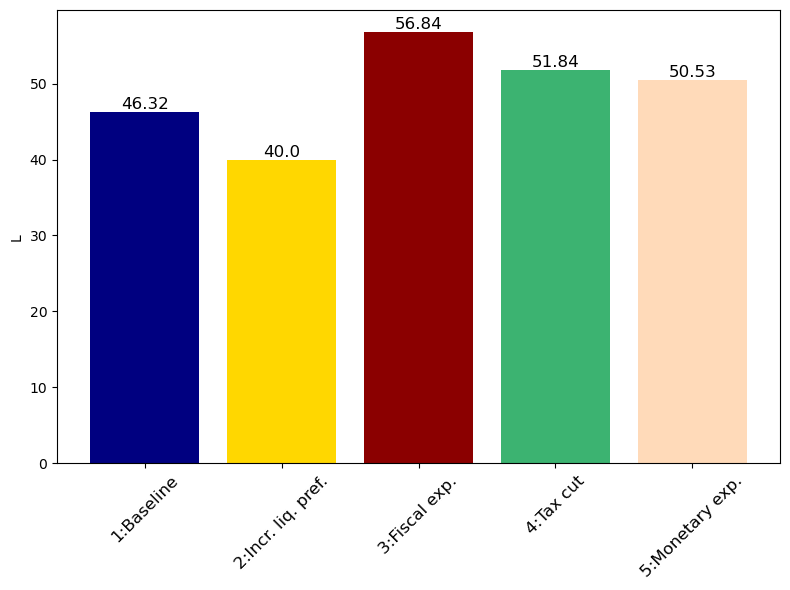

In [17]:
import matplotlib.pyplot as plt

# Output/Income outcomes  
scenario_names = ["1:Baseline", "2:Incr. liq. pref.", "3:Fiscal exp.", "4:Tax cut", "5:Monetary exp."]
colors = ['navy', 'gold', 'darkred', 'mediumseagreen', 'peachpuff']  

plt.figure(figsize=(8, 6)) 
bars = plt.bar(scenario_names, L_star, color=colors)

# Display values above the bars
for bar, value in zip(bars, L_star):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom', fontsize=12)

plt.ylabel('L')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

Unemployment rate outcomes:

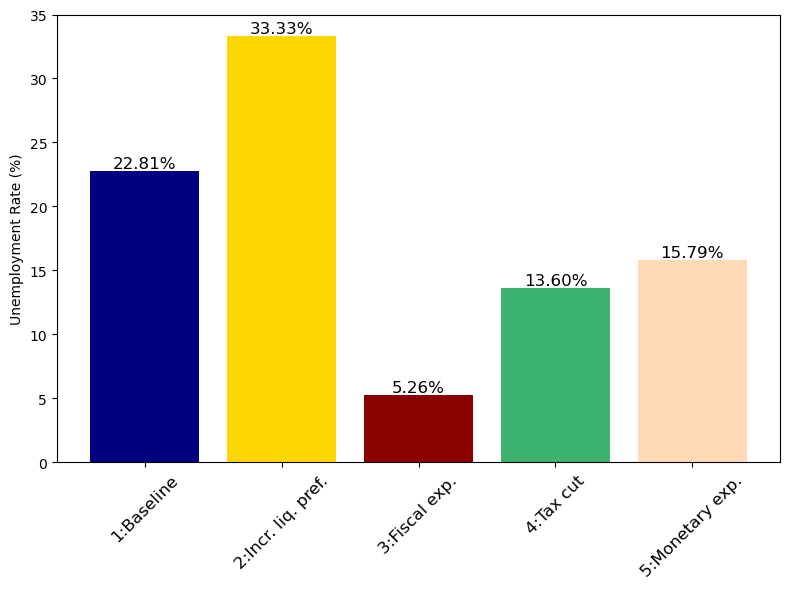

In [19]:
import matplotlib.pyplot as plt

# Convert unemployment rates to percentages
U_star_percent = [rate * 100 for rate in U_star]

# Unemployment outcomes  
scenario_names = ["1:Baseline", "2:Incr. liq. pref.", "3:Fiscal exp.", "4:Tax cut", "5:Monetary exp."]
colors = ['navy', 'gold', 'darkred', 'mediumseagreen', 'peachpuff']  

plt.figure(figsize=(8, 6)) 
bars = plt.bar(scenario_names, U_star_percent, color=colors)

# Displays values above the bars
for bar, value in zip(bars, U_star_percent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}%',
             ha='center', va='bottom', fontsize=12)

plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


As employment is given by a simple factor of total output, it is no suprise that the fiscal expansion once again reigns supreme.

# Conclusion

In line with Keynes' reasoning, increased government spending is found to raise consumption while reducing the unemployment rate. Tax cuts achieve the same through stimulating consumption. Increasing liquidity preference, which raises the interest rates, is found to reduce consumption and markedly increase the unemployment level.